<a href="https://colab.research.google.com/github/WanjohiWanjohi/AICE_Exercises/blob/week_2/Week_2_Numpy_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 2 Numpy Class
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

Previous content needed for this material:

- Functions

- Methods 

- Basics of Linear Algebra

## Installing Libraries

To install a new library, Python comes with a default packet manager called **pip**. And its used in the console using the following command:

```
pip install newlibrary
```

A console command can also be executed from a notebook by using !. So to install the library newlibrary with pip inside a notebook we would need to do something like this:


In [ ]:
!pip install newlibrary

And to be able to use this libary from our code, its necessary to import it.

In [ ]:
import newlibrary

If newlibrary contains several modules, those can also be individualy imported using **from**. 

Lets see an example with the module newmodule from our newlibrary

In [ ]:
from newlibrary import newmodule

Libraries can also be imported using an alias by using **as**. 

In [ ]:
import newlibrary as nl

## Preamble: Basic Libraries

Before jumping into Numpy, lets quickly see how to install and import Python libraries alongside with some basic and helpfull libraries.

### Math

The library Math includes several basic math functions and constants.

In [ ]:
import math as m

print('pi: {}'.format(m.pi))
print('e: {}'.format(m.e))

print('cos(0): {}'.format(m.cos(0)))
print('cos(pi): {}'.format(m.cos(m.pi)))

pi: 3.141592653589793
e: 2.718281828459045
cos(0): 1.0
cos(pi): -1.0


### Pickle

While working with data, it is often important to save and compress the data. The library Pickle allows us to save and load data structures and objects in a format similar to a .zip or .rar.  


In [ ]:
import pickle 

file = 'Some large file'

with open('pickle_test.pkl', 'bw') as handler: # b refers to binary and w to write
    pickle.dump(file, handler) # saves the file

In [ ]:
del file # deleting the object file
print(file)

NameError: ignored

In [ ]:
with open('pickle_test.pkl','br') as data: # here the r is for read
    file = pickle.load(data) # Loading the saved data
print(file)

Some large file


### Time

The time library contains several methods to access and measure time.

In [ ]:
import time

print(time.gmtime())

time.struct_time(tm_year=2021, tm_mon=1, tm_mday=5, tm_hour=11, tm_min=7, tm_sec=50, tm_wday=1, tm_yday=5, tm_isdst=0)


In [ ]:
start = time.time() # gets starting time

time.sleep(5) # waits 5 seconds

end = time.time() # gets end time

print('Execution time: ', end - start) # total time 

Execution time:  5.005200386047363


Measuring execution time can be a powefull tool when optimizing a time costly operation. 

Even if this implementation works good enough, as a side note let's introduce some more powerfull time measuring tools.  

In a notebook, we can the functions time and timeit as cell magic to measure the time of simple processes.

Let's see an example:


In [ ]:
%%time 

time.sleep(3) # Or some other process

CPU times: user 296 µs, sys: 23 µs, total: 319 µs
Wall time: 3 s


In [ ]:
%%timeit 

time.sleep(3)

1 loop, best of 3: 3 s per loop


## Numpy

NumPy (Numerical Python) is an open source Python library that contains high performance operations for mathematics, linear algebra, probabilities and data manipulation.

One of it's most important uses is the efficient handling of multidimentional arrays. It also has integration with C/C++ and Fortran.




Can be installed using pip with the following line in the terminal:



```
pip install numpy
```

or the following line in a jupyter cell:

In [ ]:
!pip install numpy

In Google Colaboratory, Numpy is installed by default, but it still needs to be imported. This is usually done with the alias np.

In [ ]:
import numpy as np

### Arrays

Numpy arrays are a type of data structure that contains values inside a grid structure.

An array can be initialized by the following ways:

By passing a list to np.array()

1. Empty list

In [ ]:
empty_array = np.array([])

empty_array

array([], dtype=float64)

2. List of values

In [ ]:
test_list = [1, 2, 3, 4]

test_array = np.array(test_list)

test_array

array([1, 2, 3, 4])

3. List of lists

In [ ]:
matrix_list = [[1,2], [3,4]]

matrix_array = np.array(matrix_list)

matrix_array

array([[1, 2],
       [3, 4]])

By using an array initializer with a default value.

1. Array of ones

In [ ]:
np.ones([2, 3]) # First dimension of size 2 and second one of size 3

array([[1., 1., 1.],
       [1., 1., 1.]])

2. Array of zeros

In [ ]:
np.zeros((2,3)) # A tuple can also be passed

array([[0., 0., 0.],
       [0., 0., 0.]])

3. Array of random numbers between [0,1] 


In [ ]:
np.random.random([2,3])

array([[0.32340441, 0.64626558, 0.14270884],
       [0.05117606, 0.53533044, 0.48401192]])

Or by using arange() or linspace() to automaticaly create secuences

In [ ]:
# Array with the integers 0, 1, ... , 9
np.arange(10) # Remember that the 0 is counted in Python

In [ ]:
# Arange can also accept a start and step argument
np.arange(10, 20, 2) # Array of even numbers between 10 and 19 

array([10, 12, 14, 16, 18])

In [ ]:
# Array of 10 evenly spaced numbers between 0 and 5
np.linspace(0, 5, 10) # start, stop, n_samples

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

### Dimensions of arrays

All numpy arrays are n-dimensional, this means that that they can represent from points to complex multidimensional structures.

As a general rule, 1-dimensional arrays are called vectors and 2-dimensional arrays or more are matrices.

While working with arrays its almos always important to keep in mid their dimensinality. Luckly all numpy arrays come with some tools to know all you need about their dimensions.

1. **.ndim** : Returns the number of dimentions in an array

In [ ]:
m = np.ones([2, 3]) # matrix of 2x3
m.ndim

2

2. **.shape** : Returns a tuple with the number of elements along each axis.


In [ ]:
m = np.ones([2, 3]) # matrix of 2x3
m.shape

(2, 3)

2. .size : Returns the total number of elements in an array. 

In [ ]:
m = np.ones([2, 3]) # matrix of 2x3
m.size

6

### Reshaping


While working or operating over arrays, its often necessary to modify its dimensions.

Luckly for us, Numpy also comes with a bunch of metods that makes this easy.


In [ ]:
a = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
print('Original shape :', a.shape)

# Reshape
# Reshapes the array to a new shape
# Note: The reshape must have the same number of elements
reshaped = np.reshape(a, (5, 2))
print('Reshape size :', reshaped.shape)

# Expand dimensions
# Adds a new dimension to the array
ext_dim = np.expand_dims(a, axis=2)
print('Expand dimension size :', ext_dim.shape)

# Transpose 
# Returns the transpose matrix of an array
t = a.T
print('Transpose shape: ', t.shape)

# Flatten 
# Flattens the array to a new 1-d vector
flat = a.flatten()
print('Flatten shape :', flat.shape)

# Ravel
# Returns a 1-d view of the array. This means that  if you modify the view, 
# it can modify the original array entries.
rav = a.ravel()
print('Ravel : ', rav.shape)
rav[0] = -1 # Modifying the view
print('Original array', a)

Original shape : (2, 5)
Reshape size : (5, 2)
Expand dimension size : (2, 5, 1)
Transpose shape:  (5, 2)
Flatten shape : (10,)
Ravel :  (10,)
Original array [[-1  1  2  3  4]
 [ 5  6  7  8  9]]


> Note: A common mistake is confusing a 2-d array with a dimension of shape 1 with a 1-d array. 

> In other words, an array of shape (2,1) is not the same as one of shape (2,).

> Try to keep this in mind if you find yourself with some dimensionality errors.

### Aritmetic

Numpy arrays also can be operated with basic aritmetic

In [ ]:
x = np.array([0, 1, 2])
y = np.array([9, 8, 7])

print('x + y = ', x + y)
print('x - y = ', x - y)
print('x * y = ', x * y)
print('x / y = ', x / y)

x + y [9 9 9]
x - y [-9 -7 -5]
x * y [ 0  8 14]
x / y [0.         0.125      0.28571429]


We can also get the max, min, their index and the sum of the values.

We can also pass an axis argument to operate in a particular axis.

In [ ]:
a = np.array([[1, 2, 3, 4], [9, 8, 0, 3]])

print('max : \t\t\t', np.max(a))
print('max axis 0 : \t\t', np.max(a, axis = 0))
print('min : \t\t\t', np.max(a))
print('min axis 1 : \t\t', np.min(a, axis = 1))
print('arg max : \t\t', np.argmax(a))
print('arg max axis 0: \t', np.argmax(a, axis = 0))
print('arg min : \t\t', np.argmin(a))
print('arg min axis 1 : \t', np.argmin(a, axis = 1))
print('sum : \t\t\t', np.sum(a))
print('sum axis 0 : \t\t', np.sum(a, axis = 0))

max : 			 9
max axis 0 : 		 [9 8 3 4]
min : 			 9
min axis 1 : 		 [1 0]
arg max : 		 4
arg max axis 0: 	 [1 1 0 0]
arg min : 		 6
arg min axis 1 : 	 [0 2]
sum : 			 30
sum axis 0 : 		 [10 10  3  7]


### Broadcasting

What happens if we want to operate arrays of different sizes or an array with a scalar? 

Again, luckily for us, Numpy arrays comme with another property: broadcasting.

To apply broadcasting over arrays, it is necesary to follow one of two rules:

1. Two dimensions of the arrays are equal
2. One of the dimensions is 1

> Note: Arrays don need to have the same number of dimensions.



In [ ]:
x = np.ones((3,2))

x * 5 # Broadcasting with a scalar

array([[5., 5.],
       [5., 5.],
       [5., 5.]])

In [ ]:
x = np.random.random((255, 255, 3)) # Lets supose a random image
# Colors are stored in rgb (red, green, blue)
mask = np.array([1, 0, 0]) # Lets make a mask to only get the red colors
x * mask # Broadcasting over the axis with dimension 3

array([[[0.05790407, 0.        , 0.        ],
        [0.38655452, 0.        , 0.        ],
        [0.91856911, 0.        , 0.        ],
        ...,
        [0.12600722, 0.        , 0.        ],
        [0.61158806, 0.        , 0.        ],
        [0.52028399, 0.        , 0.        ]],

       [[0.80385431, 0.        , 0.        ],
        [0.83793821, 0.        , 0.        ],
        [0.21284892, 0.        , 0.        ],
        ...,
        [0.77881444, 0.        , 0.        ],
        [0.30579561, 0.        , 0.        ],
        [0.67227457, 0.        , 0.        ]],

       [[0.5408901 , 0.        , 0.        ],
        [0.29061865, 0.        , 0.        ],
        [0.03660604, 0.        , 0.        ],
        ...,
        [0.88862806, 0.        , 0.        ],
        [0.56750931, 0.        , 0.        ],
        [0.70044786, 0.        , 0.        ]],

       ...,

       [[0.75916139, 0.        , 0.        ],
        [0.69504343, 0.        , 0.        ],
        [0.84170737, 0

### Slicing

Numpy arrays can also by sliced like Python lists

In [ ]:
a = np.array([[1,2], [3,4]])

print(a[0])
print(a[1,0])
print(a[-1])
print(a[:,1])

[1 2]
3
[3 4]
[2 4]


### Linear Algebra

Most linear algebra operations on vectors and matrices can also be done with Numpy arrays

In [ ]:
# Matrix 3x4
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Matrix 4x2
b = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Matrix multiplication 3x4 @ 4x2 = 3x2
c = np.matmul(a, b)
c 

array([[ 50,  60],
       [114, 140],
       [178, 220]])

In [ ]:
# Matrix 3x4
w = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Vector 4x1
x = np.array([1, 2, 3, 4])

# Vector 3x1
b = np.array([4, 5, 6])

# @ can also be used to multiply matrices
z = w @ x + b # 3x4 @ 4x1 + 3x1 
z

array([ 34,  75, 116])

### Vectorization

Numpy operations are extremly efficient, allowing to obtain optimal speeds even when Python is an interpreted language.

With such efficient speeds, it is posible to optimize the overall code running time if you can identify when it is possible to apply vectorization and broadcasting.

Put simply, vectorization consists of replacing iterations with a vector, array operation, or broadcasting.


In general, always try to consider if a for loop can be vectorized instead.  This will become  important later when working with deep learning models ;)

Let's see how much time we can save by vectorizing some operations:

In [ ]:
# A function with a for loop
def slow_operation(n=1000):
    arr = np.arange(n)
    diff = np.zeros(n-1)
    
    for i in range(1, n):
        diff[i-1] = np.sqrt(arr[i]**2 - arr[i-1]**2)
    
    return sum(diff)/n
    
slow_operation()

29.769614699783833

Let's time it

In [ ]:
%timeit slow_operation()

100 loops, best of 3: 2.78 ms per loop


In [ ]:
# The same operation vectorized
def fast_operation(n=1000):
    arr = np.arange(n)
    diff = np.sqrt(arr[1:]**2 - arr[:-1]**2)
    
    return sum(diff)/n
    
fast_operation()

29.769614699783833

Let's time it

In [ ]:
%timeit fast_operation()

10000 loops, best of 3: 192 µs per loop


Its not even close! 

Even if this diference seems small, when working with large datasets this small optimizations can save you from hours to days of running time.

### Data Normalization

Often while working with data, diferent kinds of features can have diferent means and deviations. If we try to visualize this data it might not be understandable or if we feed this raw data to a machine learning model the predictions might be incorrect.

One solution to this problem is to normalize the features, so they have a similar mean and variance. 

In Python there are several libraries and tools that can help in data normalization, but in this lab lets see how to do it with Numpy.

With a custom normalizing function:

In [ ]:
 A = np.array([[1,1,1],[4,5,6],[7,8,9]])

 def normalize(features):
     mean = np.mean(features, axis=0)
     print("Feature wise mean: ", mean)
     deviation = np.std(features, axis=0)
     print("Feature wise deviation: ", deviation)
     # to avoid division by 0
     std_feat = (features - mean)/(deviation + 1e-8)
     return std_feat

normalize(A)

Feature wise mean:  [4.         4.66666667 5.33333333]
Feature wise deviation:  [2.44948974 2.86744176 3.29983165]


array([[-1.22474487, -1.27872402, -1.3131983 ],
       [ 0.        ,  0.11624764,  0.20203051],
       [ 1.22474487,  1.16247638,  1.1111678 ]])

There are more ways to normalize data, but this goes beyond the focus of the lab, if you are interested please check the references at the end.

### Linear Regression 

Linear regression is one of the first and most basic supervised learning algorithms. 

Still, a quick linear regresion can give a starting point before trying more complex models, and in some cases it might work just as well.

Like in normalization, Python has several libraries that can do linear regression, but let's try to build an implementetion using Numpy.



The coefficients are b0 -0.40 and b1 1.97 


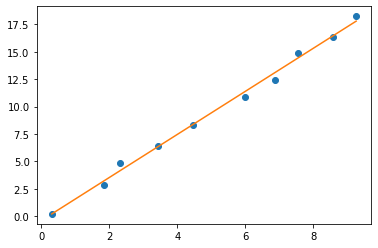

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data in an array
#sample = np.array([[1,3],[2,4],[3,5.5],[4,8.2],[5,10],[6,11],[7,13], [8,14.2], [9,19], [10,20.3]])
# Some random data
sample = np.array([[x + np.random.random(), x*2 + np.random.random()] for x in range(10)]) 

# Get the x and y values 
x = sample[:,0]
y = sample[:,1]

# Find the number of samples in the data
n = x.size

# Calculate the mean values for x and y
xm, ym = np.mean(x), np.mean(y)

# Calculate the coefficients
b1 = (np.sum(y*x) - n*ym*xm) / (np.sum((x - xm)**2))
b0 = ym - b1*xm

# print the results
print("The coefficients are b0 %2.2f and b1 %2.2f " % (b0,b1))

# Plot the original data
plt.plot(x, y, 'o') 
# Plot the linear regression
plt.plot(x, x*b1 + b0)
plt.show()

That looks like a start!

It's easy to dismiss this simple algorithms when you are used to working with more complex and exiting models, but they still have their uses to this day,  so try to consider them when working in a real life problem.

> Note: Numpy already has a method to fit lines called polyfit, but for educational purposes we have ignored it here. 



## Exercise

Download the data from the google sheets 'Simple linear regression', 'Small multivariative linear set' and 'Multivariate linear regression sample dataset' as a csv. They can be found in the Labs folder.

We haven't talked about how to load a csv data yet, so in case you are not familiar with it, use the provided function 'csv_loader()' to get the raw data. 

For each of the csvs: 

1. Look at the data in the sheet to understand each column.
2. Normalize each column
3. If there are more than two variables, choose some (at least 3) couples of variables that you think could be correlated, apply linear regression over them and obtain the parameters.
4. Calculate the total square error of the linear regression. 
5. Make some simple comments about your results, do they confirm your initial hypothesis? 

> Notes: 
1. Some columns of the raw data might be full of null values, remove these columns as you see accordingly. We will learn to do this in more details in further lessons.
2. Use vectorization and broadcasting for most, if not all, possible operations.
3. Instead of repeating the regression several times, use a class and methods to implement steps 2, 3, and 4.
4. It is not necessary to make a plot of the regression because we haven't explained visualization yet. Still, if you want to do so, go for it!



In [ ]:
import pandas as pd # A small spoiler of the next material

def csv_loader(path):
    data = pd.read_csv(path)
    raw_data = data.values
    return raw_data


This is the end of the lab, Numpy is a huge library with several functionalities and we cant cover them all in this material. 

Also, some of you might already be familiar with Numpy and general data manipulation, so if you are curious to learn more we recommend that you check the following links:

https://numpy.org/doc/stable/index.html

https://numpy.org/doc/stable/user/basics.broadcasting.html

https://www.cs.toronto.edu/~frossard/post/linear_regression/

Also, in case you want some extra challenges or just want some recommendations, just contact us on your Slack channel :D